# Check perturbation experiment output
Look at transport response to wind perturbation

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from glob import glob
import xarray as xr
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
import numpy as np

## Set model paths

In [3]:
base = '/archive/Marion.Alberty/FMS2021.02_mom6_devgfdl_20221223/'
hist = 'gfdl.ncrc4-intel18-prod/history/19580101.ocean_Bering_Strait.nc'

In [4]:
# output
path_ctrl = base + 'OM4p25_JRA55do1.4_r6_BeringWindPert_control/' + hist
path_v0 = base + 'OM4p25_JRA55do1.4_r6_BWP_68.193_Lx300_Ly500_tau28_v0/' + hist
path_v1 = base + 'OM4p25_JRA55do1.4_r6_BWP_68.193_Lx300_Ly500_tau28_v1/' + hist
path_v2 = base + 'OM4p25_JRA55do1.4_r6_BWP_68.193_Lx300_Ly500_tau28_v2.5/' + hist
path_v5 = base + 'OM4p25_JRA55do1.4_r6_BWP_68.193_Lx300_Ly500_tau28_v5/' + hist
path_v10 = base + 'OM4p25_JRA55do1.4_r6_BWP_68.193_Lx300_Ly500_tau28_v10/' + hist
path_v20 = base + 'OM4p25_JRA55do1.4_r6_BWP_68.193_Lx300_Ly500_tau28_v20/' + hist

## Read in model data

In [5]:
def open_model_data(flist):
    v2drop = ['average_DT', 'average_T1', 'average_T2','time_bnds']
    # open and clean up model data
    DS = xr.open_mfdataset(flist,use_cftime=True,combine='by_coords',engine='netcdf4',
                           drop_variables=v2drop)
    # Clean up coordinate names
    crds2chng = [match for match in list(DS.coords) if "_sub01" in match]
    for i in crds2chng:
        DS = DS.rename_dims({i:i[:2]}).rename({i:i[:2]})
        
    # open the static file
    OS = xr.open_dataset(flist.replace('ocean_Bering_Strait','ocean_static'),engine='netcdf4')
    
    # assign geolat and geolon from ocean static
    DS = DS.assign_coords({'geolon':OS['geolon'].sel(xh=DS.xh,yh=DS.yh),
                           'geolat':OS['geolat'].sel(xh=DS.xh,yh=DS.yh),
                           'geolon_v':OS['geolon_v'].sel(xh=DS.xh,yq=DS.yq),
                           'geolat_v':OS['geolat_v'].sel(xh=DS.xh,yq=DS.yq),
                           'geolon_u':OS['geolon_u'].sel(xq=DS.xq,yh=DS.yh),
                           'geolat_u':OS['geolat_u'].sel(xq=DS.xq,yh=DS.yh)})
                               
    return DS.squeeze()

In [6]:
DS_ctrl = open_model_data(path_ctrl)
DS_v0 = open_model_data(path_v0)
DS_v1 = open_model_data(path_v1)
DS_v2 = open_model_data(path_v2)
DS_v5 = open_model_data(path_v5)
DS_v10 = open_model_data(path_v10)
DS_v20 = open_model_data(path_v20)

In [7]:
DS_ctrl

<xarray.Dataset>
Dimensions:   (nv: 2, time: 365, xh: 11, xq: 11, z_i: 36, z_l: 35)
Coordinates:
  * xh        (xh) float64 -171.4 -171.1 -170.9 -170.6 ... -169.4 -169.1 -168.9
    yh        float64 66.06
  * z_l       (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * z_i       (z_i) float64 0.0 5.0 15.0 25.0 ... 5.75e+03 6.25e+03 6.75e+03
  * time      (time) object 1958-01-01 12:00:00 ... 1958-12-31 12:00:00
  * nv        (nv) float64 1.0 2.0
    yq        float64 66.11
  * xq        (xq) float64 -171.3 -171.0 -170.8 -170.5 ... -169.3 -169.0 -168.8
    geolon    (xh) float32 ...
    geolat    (xh) float32 ...
    geolon_v  (xh) float32 ...
    geolat_v  (xh) float32 ...
    geolon_u  (xq) float32 ...
    geolat_u  (xq) float32 ...
Data variables:
    volcello  (time, z_l, xh) float32 dask.array<chunksize=(365, 35, 11), meta=np.ndarray>
    thetao    (time, z_l, xh) float32 dask.array<chunksize=(365, 35, 11), meta=np.ndarray>
    so        (time, z_l, xh) float32 dask.array<chunksize=(365, 35, 11), meta=np.ndarray>
    vmo       (time, z_l, xh) float32 dask.array<chunksize=(365, 35, 11), meta=np.ndarray>
    umo       (time, z_l, xq) float32 dask.array<chunksize=(365, 35, 11), meta=np.ndarray>
    vo        (time, z_l, xh) float32 dask.array<chunksize=(365, 35, 11), meta=np.ndarray>
    uo        (time, z_l, xq) float32 dask.array<chunksize=(365, 35, 11), meta=np.ndarray>
Attributes:
    NumFilesInSet:     0
    title:             OM4p25_JRA55do1.4_r6_BeringWindPert_control
    associated_files:  areacello: 19580101.ocean_static.nc
    grid_type:         regular
    grid_tile:         N/A

## Make some simple plots of departures from the control

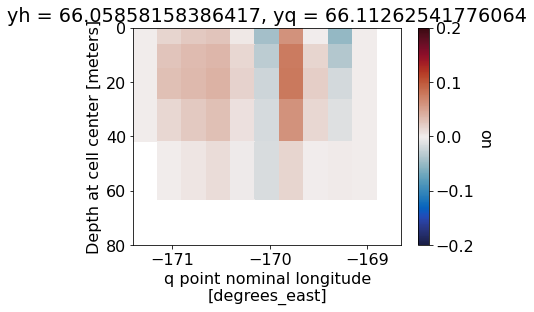

In [8]:
DS_ctrl['uo'].mean('time').plot(yincrease=False,cmap='cmo.balance',vmin=-0.2,vmax=0.2)
plt.ylim(80,0)
plt.show()

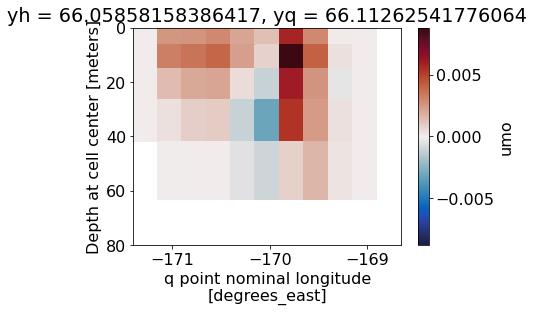

In [9]:
((DS_v20['umo'].mean('time') - DS_ctrl['umo'].mean('time'))*1e-6/1035).plot(yincrease=False,cmap='cmo.balance')
plt.ylim(80,0)
plt.show()

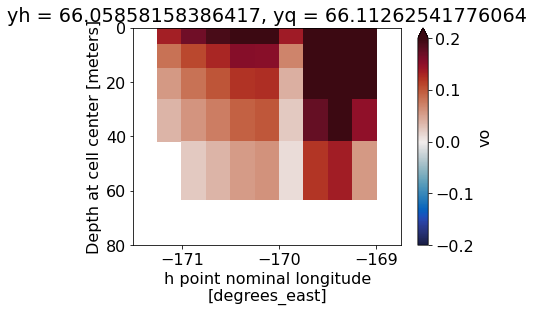

In [10]:
(DS_v20['vo'].mean('time') - DS_ctrl['vo'].mean('time')).plot(yincrease=False,cmap='cmo.balance',
                                                                     vmin=-0.2,vmax=0.2)
plt.ylim(80,0)
plt.show()

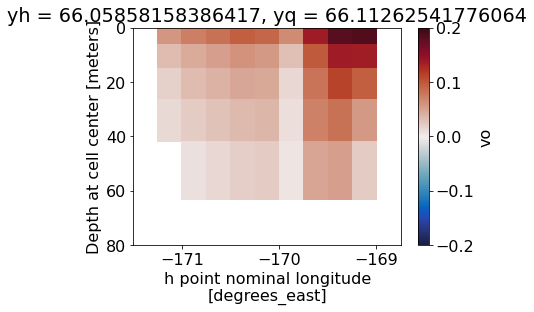

In [11]:
(DS_v10['vo'].mean('time') - DS_ctrl['vo'].mean('time')).plot(yincrease=False,cmap='cmo.balance',
                                                                     vmin=-0.2,vmax=0.2)
plt.ylim(80,0)
plt.show()

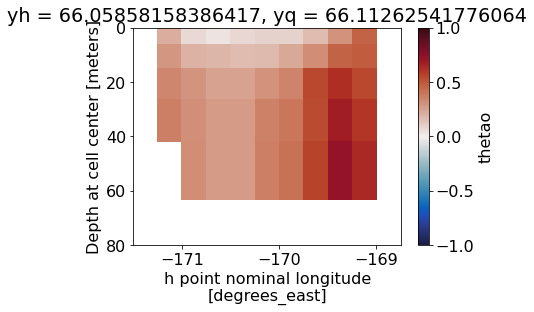

In [12]:
(DS_v10['thetao'].mean('time') - DS_ctrl['thetao'].mean('time')).plot(yincrease=False,cmap='cmo.balance',
                                                                     vmin=-1,vmax=1)
plt.ylim(80,0)
plt.show()

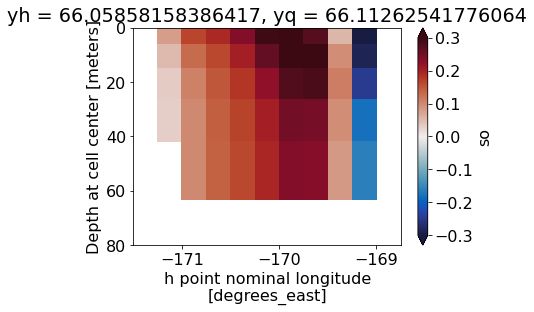

In [13]:
(DS_v20['so'].mean('time') - DS_ctrl['so'].mean('time')).plot(yincrease=False,cmap='cmo.balance',
                                                                     vmin=-0.3,vmax=0.3)
plt.ylim(80,0)
plt.show()

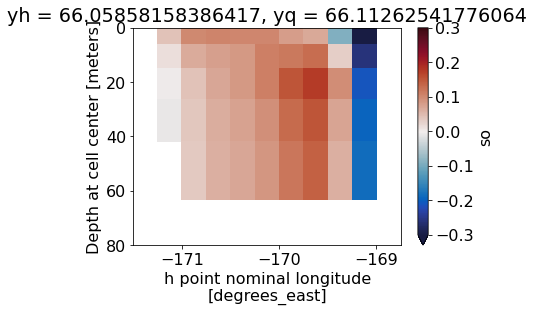

In [14]:
(DS_v10['so'].mean('time') - DS_ctrl['so'].mean('time')).plot(yincrease=False,cmap='cmo.balance',
                                                                     vmin=-0.3,vmax=0.3)
plt.ylim(80,0)
plt.show()

## Look at transport differences

In [15]:
# reference density
rho_0 = 1035
# Lat, Lon, depth of mooring observations
llz_moor = [66 + (19.6/60), -168 - (57.5/60) + 0.25, 57]
# Cross-sectional area of strait [m^2]
area_BS = 4.25e6

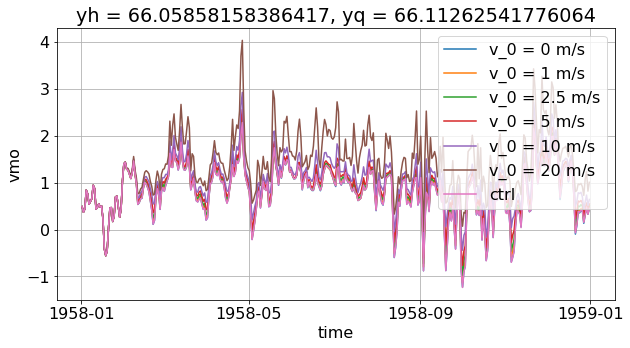

In [16]:
fig = plt.figure(figsize=(10,5))
(DS_v0['vmo'].sum(['xh','z_l'])/rho_0*(10**-6)).plot(label='v_0 = 0 m/s')
(DS_v1['vmo'].sum(['xh','z_l'])/rho_0*(10**-6)).plot(label='v_0 = 1 m/s')
(DS_v2['vmo'].sum(['xh','z_l'])/rho_0*(10**-6)).plot(label='v_0 = 2.5 m/s')
(DS_v5['vmo'].sum(['xh','z_l'])/rho_0*(10**-6)).plot(label='v_0 = 5 m/s')
(DS_v10['vmo'].sum(['xh','z_l'])/rho_0*(10**-6)).plot(label='v_0 = 10 m/s')
(DS_v20['vmo'].sum(['xh','z_l'])/rho_0*(10**-6)).plot(label='v_0 = 20 m/s')
(DS_ctrl['vmo'].sum(['xh','z_l'])/rho_0*(10**-6)).plot(label='ctrl')
plt.legend()
plt.grid()
plt.show()

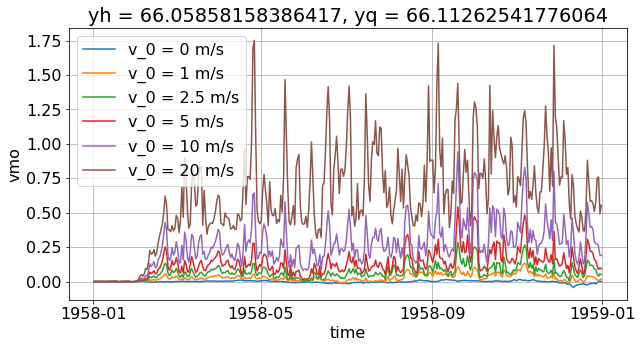

In [17]:
fig = plt.figure(figsize=(10,5))
((DS_v0['vmo'].sum(['xh','z_l']) - DS_ctrl['vmo'].sum(['xh','z_l']))/rho_0*(10**-6)).plot(label='v_0 = 0 m/s')
((DS_v1['vmo'].sum(['xh','z_l']) - DS_ctrl['vmo'].sum(['xh','z_l']))/rho_0*(10**-6)).plot(label='v_0 = 1 m/s')
((DS_v2['vmo'].sum(['xh','z_l']) - DS_ctrl['vmo'].sum(['xh','z_l']))/rho_0*(10**-6)).plot(label='v_0 = 2.5 m/s')
((DS_v5['vmo'].sum(['xh','z_l']) - DS_ctrl['vmo'].sum(['xh','z_l']))/rho_0*(10**-6)).plot(label='v_0 = 5 m/s')
((DS_v10['vmo'].sum(['xh','z_l']) - DS_ctrl['vmo'].sum(['xh','z_l']))/rho_0*(10**-6)).plot(label='v_0 = 10 m/s')
((DS_v20['vmo'].sum(['xh','z_l']) - DS_ctrl['vmo'].sum(['xh','z_l']))/rho_0*(10**-6)).plot(label='v_0 = 20 m/s')
plt.legend()
plt.grid()
plt.show()

## Compare time average of response to forcing strength

In [18]:
def mean_transport_response(DS):
    T_bar = (DS['vmo'].sum(['xh','z_l']) - DS_ctrl['vmo'].sum(['xh','z_l'])
            ).sel(time=slice('1958-04-01',None)).mean('time')/rho_0*(10**-6)
    return T_bar.values

In [19]:
def mean_mooring_response(DS):
    T_bar = (DS['vo'] - DS_ctrl['vo']).isel(xh=abs(DS_ctrl.geolon_v - llz_moor[1]).argmin().values
                                               ).sel(z_l=llz_moor[-1],method='nearest'
                                                    ).sel(time=slice('1958-04-01',None)
                                                         ).mean('time')* 1e-6 * area_BS
    return T_bar.values

In [20]:
def std_transport_response(DS):
    T_std = (DS['vmo'].sum(['xh','z_l']) - DS_ctrl['vmo'].sum(['xh','z_l'])
            ).sel(time=slice('1958-04-01',None)).std('time')/rho_0*(10**-6)
    return T_std.values

In [21]:
def std_mooring_response(DS):
    T_std = (DS['vo'] - DS_ctrl['vo']).isel(xh=abs(DS_ctrl.geolon_v - llz_moor[1]).argmin().values
                                               ).sel(z_l=llz_moor[-1],method='nearest'
                                                    ).sel(time=slice('1958-04-01',None)
                                                         ).std('time')* 1e-6 * area_BS
    return T_std.values

In [22]:
T = [mean_transport_response(DS_v0),
     mean_transport_response(DS_v1),
     mean_transport_response(DS_v2),
     mean_transport_response(DS_v5),
     mean_transport_response(DS_v10),
     mean_transport_response(DS_v20)]
Tm = [mean_mooring_response(DS_v0),
      mean_mooring_response(DS_v1),
      mean_mooring_response(DS_v2),
      mean_mooring_response(DS_v5),
      mean_mooring_response(DS_v10),
      mean_mooring_response(DS_v20)]
T_std = [std_transport_response(DS_v0),
         std_transport_response(DS_v1),
         std_transport_response(DS_v2),
         std_transport_response(DS_v5),
         std_transport_response(DS_v10),
         std_transport_response(DS_v20)]
Tm_std = [std_mooring_response(DS_v0),
          std_mooring_response(DS_v1),
          std_mooring_response(DS_v2),
          std_mooring_response(DS_v5),
          std_mooring_response(DS_v10),
          std_mooring_response(DS_v20)]
vas = [0, 1, 2.5, 5, 10, 20]

In [23]:
p = np.polyfit(vas,T,1,full=True)
pm = np.polyfit(vas,Tm,1,full=True)

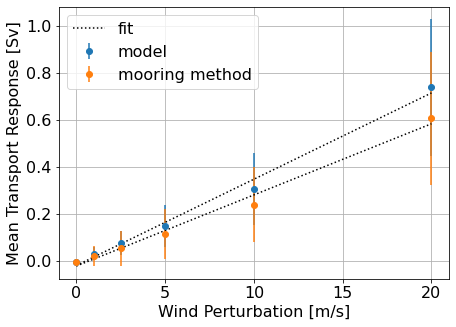

In [24]:
fig = plt.figure(figsize=(7,5))
plt.errorbar(vas,T,yerr=T_std,fmt='o',label='model')
plt.errorbar(vas,Tm,yerr=Tm_std,fmt='o',label='mooring method')
plt.plot(vas,np.polyval(p[0],vas),':k',label='fit')
plt.plot(vas,np.polyval(pm[0],vas),':k')
plt.ylabel('Mean Transport Response [Sv]')
plt.xlabel('Wind Perturbation [m/s]')
plt.legend()
plt.grid()
plt.show()
# save fig
fig.savefig('../figures/PerturbationExperiments/BStransportResponse_perWindPert.pdf')

In [25]:
print('A 0.266 Sv increase in transport would require a %.2f m/s vas perturbation.' %((0.266 - p[0][1])/p[0][0]))

A 0.266 Sv increase in transport would require a 7.74 m/s vas perturbation.


In [26]:
print('A 0.266 Sv increase in transport would require a %.2f m/s vas perturbation.' %((0.266 - pm[0][1])/pm[0][0]))

A 0.266 Sv increase in transport would require a 9.47 m/s vas perturbation.
